# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.0, high=90.0, size=1500)
lngs = np.random.uniform(low=-180.0, high=180.0, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)
#Print the country count to confirm sufficient count
len(countries)

622

In [8]:
#Create a DataFrame to hold weather data
weather_data = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview DataFrame
weather_data.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,bluff,,NZ,,,,,,
1,los llanos de aridane,,ES,,,,,,
2,rikitea,,PF,,,,,,
3,punta arenas,,CL,,,,,,
4,itoman,,JP,,,,,,
5,naples,,US,,,,,,
6,yumen,,CN,,,,,,
7,quatre cocos,,MU,,,,,,
8,birobidzhan,,RU,,,,,,
9,el faiyum,,EG,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#variables to track reponses
record_number = 1
record_set= 1
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []


#base URL 
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#API call for cities
print('''Data Retrieval in Process''')
for index, row in weather_data.iterrows():
    query_url = base_url + row['City'] + '&' + row['Country'] + '&appid=' + weather_api_key
    
    response = requests.get(query_url).json()
    
    #print exception message if city is not found in API call
    try:
        print(f'Processing Weather Data for record {record_number} of set {record_set} | {response["name"]}')
        
        #Store data in the DataFrame
        #weather_data.loc[index,"Cloudiness"] = response["clouds"]["all"]
#         weather_data.loc[index,"Date"] = response["dt"]
#         weather_data.loc[index,"Humidity"] = response["main"]["humidity"]
#         weather_data.loc[index,"Lat"] = response["coord"]["lat"]
#         weather_data.loc[index,"Lng"] = response["coord"]["lon"]
#         weather_data.loc[index,"Max Temp"] = response["main"]["temp_max"]
#         weather_data.loc[index,"Windspeed"] = response["wind"]["speed"]
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {record_number}|{city}")

        
        #Increase the record cound
        record_number += 1
        
    except (KeyError, IndexError):
        print("City not found...")
        
        #if statement to set  API limits
        if record_number ==51:
            record_set +=1
            record_number = 1
            
print('''Data Retrieval Complete''')            
        


Data Retrieval in Process
Processing Weather Data for record 1 of set 1 | Bluff
Processing record 1|chokurdakh
Processing Weather Data for record 2 of set 1 | Los Llanos de Aridane
Processing record 2|chokurdakh
Processing Weather Data for record 3 of set 1 | Rikitea
Processing record 3|chokurdakh
Processing Weather Data for record 4 of set 1 | Punta Arenas
Processing record 4|chokurdakh
Processing Weather Data for record 5 of set 1 | Itoman
Processing record 5|chokurdakh
Processing Weather Data for record 6 of set 1 | Naples
Processing record 6|chokurdakh
Processing Weather Data for record 7 of set 1 | Yumen
Processing record 7|chokurdakh
Processing Weather Data for record 8 of set 1 | Quatre Cocos
Processing record 8|chokurdakh
Processing Weather Data for record 9 of set 1 | Birobidzhan
Processing record 9|chokurdakh
City not found...
Processing Weather Data for record 10 of set 1 | Severo-Kuril'sk
Processing record 10|chokurdakh
Processing Weather Data for record 11 of set 1 | Puert

Processing Weather Data for record 91 of set 1 | Clyde River
Processing record 91|chokurdakh
Processing Weather Data for record 92 of set 1 | Thunder Bay
Processing record 92|chokurdakh
Processing Weather Data for record 93 of set 1 | Butaritari
Processing record 93|chokurdakh
Processing Weather Data for record 94 of set 1 | Jamestown
Processing record 94|chokurdakh
City not found...
Processing Weather Data for record 95 of set 1 | Havre-St-Pierre
Processing record 95|chokurdakh
City not found...
Processing Weather Data for record 96 of set 1 | Bethel
Processing record 96|chokurdakh
Processing Weather Data for record 97 of set 1 | Lewistown
Processing record 97|chokurdakh
Processing Weather Data for record 98 of set 1 | Piterka
Processing record 98|chokurdakh
Processing Weather Data for record 99 of set 1 | Mana
Processing record 99|chokurdakh
Processing Weather Data for record 100 of set 1 | Lang Son
Processing record 100|chokurdakh
Processing Weather Data for record 101 of set 1 | Qa

Processing Weather Data for record 178 of set 1 | Tautira
Processing record 178|chokurdakh
Processing Weather Data for record 179 of set 1 | Krasnyy Kut
Processing record 179|chokurdakh
Processing Weather Data for record 180 of set 1 | Omboué
Processing record 180|chokurdakh
Processing Weather Data for record 181 of set 1 | Fene
Processing record 181|chokurdakh
Processing Weather Data for record 182 of set 1 | Jieshi
Processing record 182|chokurdakh
Processing Weather Data for record 183 of set 1 | Pitkyaranta
Processing record 183|chokurdakh
Processing Weather Data for record 184 of set 1 | Naze
Processing record 184|chokurdakh
Processing Weather Data for record 185 of set 1 | Joensuu
Processing record 185|chokurdakh
Processing Weather Data for record 186 of set 1 | Port-Gentil
Processing record 186|chokurdakh
Processing Weather Data for record 187 of set 1 | Isangel
Processing record 187|chokurdakh
Processing Weather Data for record 188 of set 1 | San Jerónimo
Processing record 188|c

Processing Weather Data for record 266 of set 1 | Chokurdakh
Processing record 266|chokurdakh
Processing Weather Data for record 267 of set 1 | Parkes
Processing record 267|chokurdakh
Processing Weather Data for record 268 of set 1 | Paamiut
Processing record 268|chokurdakh
Processing Weather Data for record 269 of set 1 | Lakes Entrance
Processing record 269|chokurdakh
Processing Weather Data for record 270 of set 1 | Okahandja
Processing record 270|chokurdakh
Processing Weather Data for record 271 of set 1 | Mitsamiouli
Processing record 271|chokurdakh
Processing Weather Data for record 272 of set 1 | Calama
Processing record 272|chokurdakh
Processing Weather Data for record 273 of set 1 | Tual
Processing record 273|chokurdakh
City not found...
Processing Weather Data for record 274 of set 1 | Kānt
Processing record 274|chokurdakh
Processing Weather Data for record 275 of set 1 | Maţāy
Processing record 275|chokurdakh
City not found...
Processing Weather Data for record 276 of set 1 

Processing Weather Data for record 352 of set 1 | Kisesa
Processing record 352|chokurdakh
Processing Weather Data for record 353 of set 1 | Kaitangata
Processing record 353|chokurdakh
Processing Weather Data for record 354 of set 1 | Hofn
Processing record 354|chokurdakh
Processing Weather Data for record 355 of set 1 | Olongapo City
Processing record 355|chokurdakh
Processing Weather Data for record 356 of set 1 | Rome
Processing record 356|chokurdakh
Processing Weather Data for record 357 of set 1 | Nosy Varika
Processing record 357|chokurdakh
Processing Weather Data for record 358 of set 1 | Shangzhi
Processing record 358|chokurdakh
Processing Weather Data for record 359 of set 1 | Yen Bai
Processing record 359|chokurdakh
Processing Weather Data for record 360 of set 1 | Derzhavīnsk
Processing record 360|chokurdakh
Processing Weather Data for record 361 of set 1 | Bagn
Processing record 361|chokurdakh
Processing Weather Data for record 362 of set 1 | Comodoro Rivadavia
Processing re

Processing Weather Data for record 439 of set 1 | Sabang
Processing record 439|chokurdakh
Processing Weather Data for record 440 of set 1 | Dapdap
Processing record 440|chokurdakh
Processing Weather Data for record 441 of set 1 | Conceição do Araguaia
Processing record 441|chokurdakh
Processing Weather Data for record 442 of set 1 | Jasper
Processing record 442|chokurdakh
City not found...
Processing Weather Data for record 443 of set 1 | Horishni Plavni
Processing record 443|chokurdakh
Processing Weather Data for record 444 of set 1 | Port Said
Processing record 444|chokurdakh
Processing Weather Data for record 445 of set 1 | Santa Cruz de La Palma
Processing record 445|chokurdakh
Processing Weather Data for record 446 of set 1 | Port Lincoln
Processing record 446|chokurdakh
Processing Weather Data for record 447 of set 1 | Noumea
Processing record 447|chokurdakh
Processing Weather Data for record 448 of set 1 | Ipala
Processing record 448|chokurdakh
Processing Weather Data for record

Processing Weather Data for record 527 of set 1 | Tsurugi-asahimachi
Processing record 527|chokurdakh
Processing Weather Data for record 528 of set 1 | Chernyshevskiy
Processing record 528|chokurdakh
Processing Weather Data for record 529 of set 1 | North Battleford
Processing record 529|chokurdakh
Processing Weather Data for record 530 of set 1 | Kilindoni
Processing record 530|chokurdakh
Processing Weather Data for record 531 of set 1 | Inuvik
Processing record 531|chokurdakh
Processing Weather Data for record 532 of set 1 | Katangli
Processing record 532|chokurdakh
Processing Weather Data for record 533 of set 1 | Qaryat Sulūq
Processing record 533|chokurdakh
Processing Weather Data for record 534 of set 1 | Boca do Acre
Processing record 534|chokurdakh
Processing Weather Data for record 535 of set 1 | Husavik
Processing record 535|chokurdakh
Processing Weather Data for record 536 of set 1 | Itarema
Processing record 536|chokurdakh
Processing Weather Data for record 537 of set 1 | N

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_df = pd.DataFrame({"City": city_name, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                                         })
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,70,NZ,1619271806,92,-46.6000,168.3333,42.01,3.00
1,Los Llanos de Aridane,75,ES,1619271806,60,28.6585,-17.9182,71.60,6.91
2,Rikitea,100,PF,1619271807,77,-23.1203,-134.9692,76.62,10.78
3,Punta Arenas,0,CL,1619271733,87,-53.1500,-70.9167,46.40,10.36
4,Itoman,75,JP,1619271807,73,26.1247,127.6694,69.80,13.80


In [11]:
#export data to csv
city_df.to_csv("../output_data/WeatherData.csv", index=False, header=True)
#Display DataFrame
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,70,NZ,1619271806,92,-46.6000,168.3333,42.01,3.00
1,Los Llanos de Aridane,75,ES,1619271806,60,28.6585,-17.9182,71.60,6.91
2,Rikitea,100,PF,1619271807,77,-23.1203,-134.9692,76.62,10.78
3,Punta Arenas,0,CL,1619271733,87,-53.1500,-70.9167,46.40,10.36
4,Itoman,75,JP,1619271807,73,26.1247,127.6694,69.80,13.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_df.loc[city_df["Humidity"]>100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [13]:
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000
mean,57.387211,1.619272e+09,67.099467,21.250812,17.405716,62.364085,8.006430
std,38.050388,6.498215e+01,24.405691,32.628593,90.689188,21.788723,5.374267
min,0.000000,1.619272e+09,4.000000,-54.800000,-179.166700,-12.350000,0.560000
25%,20.000000,1.619272e+09,54.000000,-5.458350,-60.409550,46.875000,3.880000
50%,75.000000,1.619272e+09,73.000000,25.700000,20.040300,66.000000,6.870000
75%,92.000000,1.619272e+09,86.500000,49.043150,98.373850,78.920000,10.930000
max,100.000000,1.619272e+09,100.000000,78.218600,179.316700,106.860000,35.010000


In [14]:
#  Get the indices of cities that have humidity over 100%.

index_list = city_df[(city_df["Humidity"] > 100)].index


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(index_list, inplace=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [17]:
import datetime
city_date = datetime.datetime.fromtimestamp(int(city_df["Date"][0])).strftime('%Y-%m-%d')
city_date


'2021-04-24'

This plot shows that as the cities move further away from the equator, temperatures decrease.


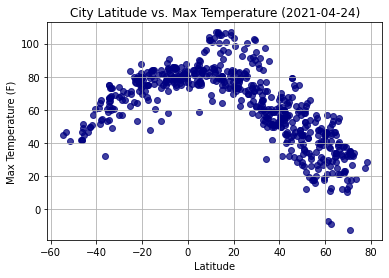

In [18]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({city_date})")
plt.savefig("../output_data/Latitude vs. Max Temp plot.png")
print("This plot shows that as the cities move further away from the equator, temperatures decrease.")
plt.show()


## Latitude vs. Humidity Plot

This plot doesn't show a strong correlation between latitude and humidity, but it does show that the majority of cities have a humidity of greater than 50.


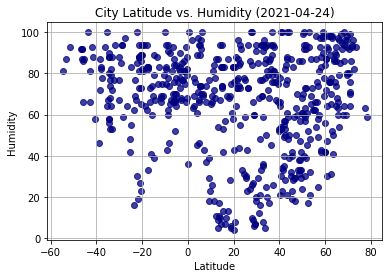

In [19]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({city_date})")
plt.savefig("../output_data/Latitude vs. Humidity plot.png")
print("This plot doesn't show a strong correlation between latitude and humidity, but it does show that the majority of cities have a humidity of greater than 50.")
plt.show()

## Latitude vs. Cloudiness Plot

This plot shows that there is no real pattern to describe the relationship between latitude and cloudiness.


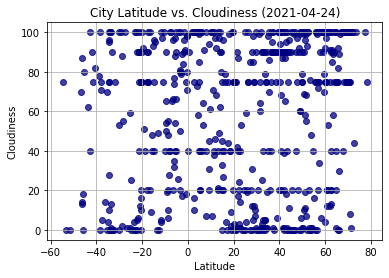

In [20]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({city_date})")
plt.savefig("../output_data/Latitude vs. Cloudiness plot.png")
print("This plot shows that there is no real pattern to describe the relationship between latitude and cloudiness.")
plt.show()

## Latitude vs. Wind Speed Plot

This plot shows that there is no real pattern that can describe the relationship between latitude and windspeed, but the majority of wind speeds fall between 0-10 mph.


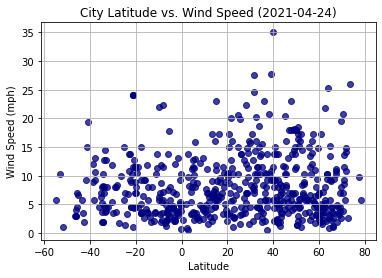

In [21]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({city_date})")
plt.savefig("../output_data/Latitude vs. Wind Speed plot.png")
print("This plot shows that there is no real pattern that can describe the relationship between latitude and windspeed, but the majority of wind speeds fall between 0-10 mph.")
plt.show()

## Linear Regression

In [22]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
north_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) > 0, :]
south_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.0x + 97.28
The regression shows a negative correlation.
The farther away you travel in latitude away from the equator, the more the temperature decreases.
The r-squared is: -0.8359373217526413


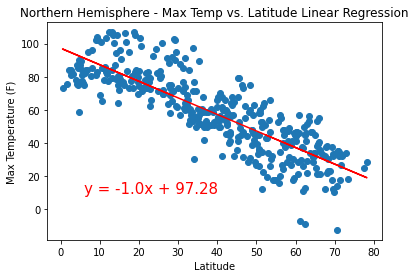

In [23]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The regression shows a negative correlation.")
print(f"The farther away you travel in latitude away from the equator, the more the temperature decreases.")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.7x + 85.66
The r-squared is: 0.7883998732210181
The regression displays a positive correlation.
As you get closer to the equator in latitude, the temperature increases.


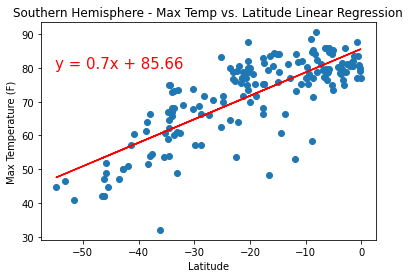

In [26]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print(f"The regression displays a positive correlation.")
print(f"As you get closer to the equator in latitude, the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 54.28
There is a weak correlation between humidity and latitude in the Northern Hemisphere.
The r-squared is: 0.18478684349414357


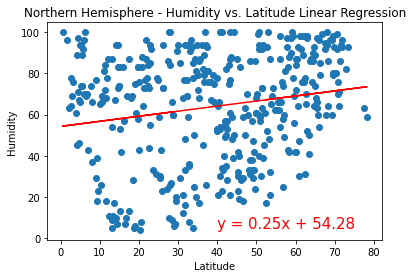

In [27]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"There is a weak correlation between humidity and latitude in the Northern Hemisphere.")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 72.35
There is a weak correlation between humidity and latitude in the Southern Hemisphere.
The r-squared is: -0.09854941976487416


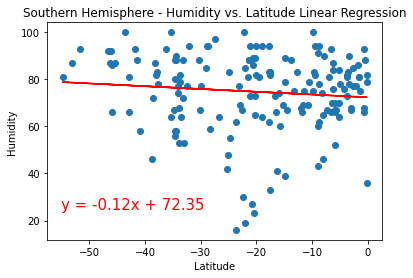

In [28]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"There is a weak correlation between humidity and latitude in the Southern Hemisphere.")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.37x + 41.66
There is a weak correlation between humidity and latitude in the Northern Hemisphere.
The r-squared is: 0.194555992805814


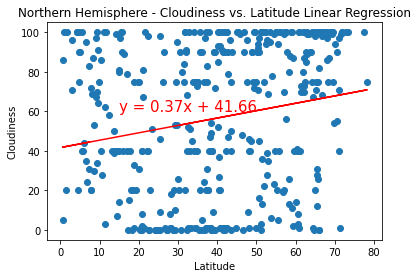

In [73]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"There is a weak correlation between cloudiness and latitude in the Northern Hemisphere.")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.49x + 65.49
There is a weak correlation between cloudiness and latitude in the Southern Hemisphere.
The r-squared is: 0.18576095343979188


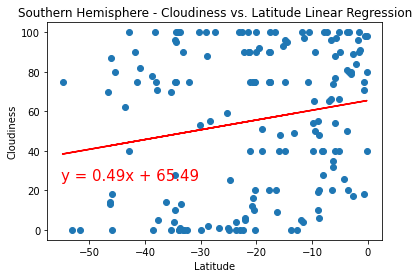

In [29]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"There is a weak correlation between cloudiness and latitude in the Southern Hemisphere.")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.0x + 8.23
There is no correlation between wind speed and latitude in the Northern Hemisphere.
The r-squared is: 0.013448275719230006


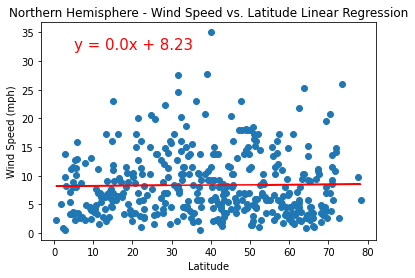

In [31]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,32),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"There is no correlation between wind speed and latitude in the Northern Hemisphere.")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 6.57
There is a negative weak correlation between wind speed and latitude in the Southern Hemisphere.
The r-squared is: -0.08215879687331581


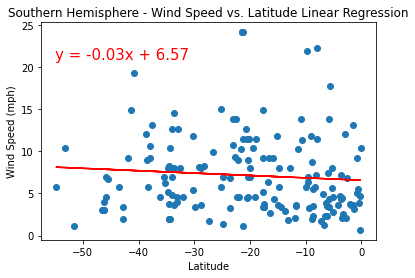

In [32]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"There is a negative weak correlation between wind speed and latitude in the Southern Hemisphere.")
print(f"The r-squared is: {rvalue}")
plt.show()